# Bondora credit risk dataset

#This Notebook is just for preparing dataset csv from IEEE loan history csv.Here we will reduce no. of columns and keep the ones we need for feature engineering.
#Example: we need income but we don't need to include loanid,applicationid,no. of scheduled payment as that will not play any role in model prediction traning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("C:\\Users\\dipsa\\Downloads\\cv new sayanti\\python project\\ML_Jupyter_2024\\LoanData_Bondora.csv", low_memory=False)

df.shape

(179235, 112)

In [4]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2021-07-20,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150,5.0,BO965519,False,2016-03-17 12:39:22,2016-03-23,2020-06-26,2016-05-12,2021-04-12,2020-06-26,17,4,4.0,1,53,NaN,1.0,EE,2125.0,2125.0,20.97,60,62.05,NaN,NaN,2,4.0,2.0,0,6.0,MoreThan5Years,NaN,15To25Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09,6,26.29,10.92,12,True,630.22,1251.98,2021-06-16,552.0,2020-01-14,630.0,2019-10-28,0.068512,0.58,0.141145,0.122216,2020-01-14,1155.84,1251.98,77.68,1251.98,64.07,96.14,0.0,2.0,2020-03-03 09:27:48.493000000,2.0,C,NaN,NaN,NaN,NaN,C,Late,False,180+,180+,NaN,NaN,NaN,1000.0,969.16,1187.91,0.00,0.00,1155.84,433.60,1.0,500.0,590.95,0.0,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,51.73,31-60
1,2021-07-20,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0,1705.0,BOA9K172A,False,2015-06-24 12:36:16,2015-06-25,NaN,2015-08-17,2020-07-17,2020-07-17,11,5,1.0,1,50,NaN,1.0,EE,3000.0,3000.0,17.12,60,84.75,NaN,NaN,3,5.0,2.0,0,5.0,MoreThan5Years,NaN,MoreThan25Years,7.0,1.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,4,736.45,0,30.58,78.80,17,True,1333.51,3000.00,2019-06-19,1918.0,2016-04-18,1979.0,2016-02-17,0.030799,0.65,0.140436,0.036449,2016-06-02,2436.41,2658.82,1078.96,2730.84,2370.77,294.43,0.0,2.0,2019-08-01 14:18:33,1.0,B,NaN,NaN,0.030799,B,B,Late,False,180+,180+,NaN,NaN,NaN,1000.0,563.59,360.07,0.00,0.00,2436.41,2291.82,1.0,1800.0,445.26,3000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,47.08,180+
2,2021-07-20,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565,5835.0,BO7971663,True,2016-01-07 15:37:16,2016-01-19,2019-10-24,2016-02-22,2021-01-20,2021-01-20,22,3,4.0,1,44,NaN,0.0,EE,10630.0,9100.0,13.67,60,268.57,NaN,NaN,3,4.0,4.0,1,5.0,UpTo3Years,NaN,MoreThan25Years,8.0,8.0,600.0,0.0,0.0,0.0,0.0,0.0,600.0,1200.0,7,905.00,3,26.71,349.43,20,True,3348.50,9100.00,2019-10-23,1368.0,2017-10-20,1428.0,2017-08-21,0.023177,0.58,0.113484,0.041344,2017-12-06,0.00,6456.37,1537.37,6723.01,501

## Data Understanding

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

## Target variable

If the customer defaulted, there will be a date in the `DefaultDate` variable.

In [5]:
# create target variable

df["Default"] = np.where(df["DefaultDate"].isnull(), 0, 1)

# the default rate
df["Default"].mean()

np.float64(0.39844896365107263)

In [6]:
df["Default"].unique()

array([1, 0])

## Drop features

Some feaures are not important for prediction.

In [7]:
cols_del = [
    "Status",
    
    # Id and user data features
    'ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'UserName',
    
    # Application related, not useful
    'BiddingStartedOn',  'NextPaymentNr', 'NrOfScheduledPayments', 
    
    # Income related
    'IncomeFromPrincipalEmployer', 'IncomeFromPension',
    'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
    'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
    
    # Application date related
    'ApplicationSignedHour', 'ApplicationSignedWeekday', 
    'ActiveScheduleFirstPaymentReached', 
    
    # Company risk related
    'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
    'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
    'StageActiveSince', 'ModelVersion', 'WorseLateCategory',
]

df[cols_del].head()

,Status,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,UserName,BiddingStartedOn,NextPaymentNr,NrOfScheduledPayments,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,ApplicationSignedHour,ApplicationSignedWeekday,ActiveScheduleFirstPaymentReached,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,StageActiveSince,ModelVersion,WorseLateCategory
0,Late,2021-07-20,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,BO965519,2016-03-23 16:07:19,NaN,NaN,0.0,301.0,0.0,53.0,0.0,0.0,0.0,17,4,True,0.068512,0.58,0.141145,0.122216,1155.84,2020-03-03 09:27:48.493000000,2.0,180+
1,Late,2021-07-20,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,BOA9K172A,2015-06-25 11:02:28,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,11,5,True,0.030799,0.65,0.140436,0.036449,2436.41,2019-08-01 14:18:33,1.0,180+
2,Repaid,2021-07-20,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,BO7971663,2016-01-14 10:00:21,NaN,NaN,600.0,0.0,0.0,0.0,0.0,0.0,600.0,22,3,True,0.023177,0.58,0.113484,0.041344,0.00,2018-02-28 14:43:37.670000000,2.0,180+
3,Late,2021-07-20,87227056-6BF9-410C-98D1-008F788E122A,349381,2015-03-24 15:55:44,BO76151K3,2015-03-24 15:55:44,NaN,NaN,863.0,0.0,0.0,0.0,0.0,0.0,0.0,15,3,True,0.220810,0.90,0.183229,0.188726,1035.27,2020-11-27 00:00:00,1.0,180+
4,Late,2021-07-20,2DDE6336-E466-4624-A337-00A0ED1A1468,443082,2015-12-17 10:12:00,BOK423A63,2015-12-17 10:12:00,NaN,NaN,0.0,697.0,0.0,0.0,0.0,0.0,0.0,20,3,True,0.568678,0.75,0.115240,0.749511,1089.99,2020-11-27 00:00:00,2.0,180+


In [8]:
df = df.drop(cols_del, axis=1)

df.shape

(179235, 86)

### Date variables

In [9]:
cols_date = [var for var in df.columns if "Date" in var]

cols_date

['LoanApplicationStartedDate',
 'LoanDate',
 'ContractEndDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'DateOfBirth',
 'PlannedPrincipalTillDate',
 'PlannedInterestTillDate',
 'DefaultDate',
 'NextPaymentDate']

In [10]:
df = df.drop(cols_date, axis=1)

df.shape

(179235, 75)

### Variables we do not have at time of application

In [11]:
cols_debt = [var for var in df.columns if "Debt" in var]

cols_debt

['DebtToIncome',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost']

In [12]:
# This is a credit bureau variable

cols_debt.remove("DebtToIncome")

cols_debt

['CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost']

In [13]:
df = df.drop(cols_debt, axis=1)

df.shape

(179235, 69)

### Interest variables

In [14]:
cols_int = [var for var in df.columns if "Interest" in var]

cols_int

['Interest',
 'PlannedInterestPostDefault',
 'InterestRecovery',
 'InterestAndPenaltyPaymentsMade',
 'InterestAndPenaltyWriteOffs',
 'InterestAndPenaltyBalance']

In [15]:
df = df.drop(cols_int, axis=1)

df.shape

(179235, 63)

### Payment related

In [16]:
cols_pay = [var for var in df.columns if "Payment" in var]

cols_pay

['MonthlyPayment',
 'MonthlyPaymentDay',
 'LastPaymentOn',
 'PrincipalPaymentsMade',
 'ActiveLateLastPaymentCategory']

In [17]:
df = df.drop(cols_pay, axis=1)

df.shape

(179235, 58)

### P-2-P model predictions

In [18]:
cols_rating = [var for var in df.columns if "Rating" in var]

cols_rating

['Rating', 'Rating_V0', 'Rating_V1', 'Rating_V2']

In [19]:
df = df.drop(cols_rating, axis=1)

df.shape

(179235, 54)

### Additional variables

In [20]:
cols_del = [
    "BidsPortfolioManager",
    "BidsApi",
    "BidsManual",
    "Amount",
    "RefinanceLiabilities",
    "PlannedPrincipalPostDefault",
    "PrincipalRecovery",
    "RecoveryStage",
    "EAD1",
    "EAD2",
    "EL_V0",
    "EL_V1",
    "ActiveLateCategory",
    "Restructured",
    "GracePeriodStart",
    "GracePeriodEnd",
    "ReScheduledOn",
    "PrincipalWriteOffs",
    "PrincipalBalance",
]

In [21]:
df = df.drop(cols_del, axis=1)

df.shape

(179235, 35)

## Missing Values

In [22]:
pd.set_option('display.max_rows', None)

df.isnull().mean()

NewCreditCustomer                         0.000000
VerificationType                          0.000279
LanguageCode                              0.000000
Age                                       0.000000
Gender                                    0.000251
Country                                   0.000000
AppliedAmount                             0.000000
LoanDuration                              0.000000
County                                    1.000000
City                                      1.000000
UseOfLoan                                 0.000000
Education                                 0.000279
MaritalStatus                             0.000279
NrOfDependants                            0.801378
EmploymentStatus                          0.001127
EmploymentDurationCurrentEmployer         0.008960
EmploymentPosition                        1.000000
WorkExperience                            0.796234
OccupationArea                            0.000508
HomeOwnershipType              

Removing all the features which have more than 40% missing values

In [23]:
df.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,LoanDuration,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,FreeCash,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
0,False,4.0,1,53,1.0,EE,2125.0,60,NaN,NaN,2,4.0,2.0,0,6.0,MoreThan5Years,NaN,15To25Years,1.0,1.0,354.0,8,485.09,26.29,10.92,NaN,NaN,NaN,1000.0,1.0,500.0,590.95,0.0,0.0,1
1,False,1.0,1,50,1.0,EE,3000.0,60,NaN,NaN,3,5.0,2.0,0,5.0,MoreThan5Years,NaN,MoreThan25Years,7.0,1.0,900.0,4,736.45,30.58,78.80,NaN,NaN,NaN,1000.0,1.0,1800.0,445.26,3000.0,1.0,1
2,True,4.0,1,44,0.0,EE,10630.0,60,NaN,NaN,3,4.0,4.0,1,5.0,UpTo3Years,NaN,MoreThan25Years,8.0,8.0,1200.0,7,905.00,26.71,349.43,NaN,NaN,NaN,1000.0,0.0,0.0,0.00,0.0,0.0,1
3,True,3.0,6,42,0.0,ES,1500.0,60,NaN,NaN,2,2.0,1.0,0,3.0,UpTo5Years,NaN,5To10Years,1.0,2.0,863.0,1,350.00,7.36,449.47,M3,B,NaN,NaN,0.0,0.0,0.00,1500.0,1.0,1
4,True,4.0,6,34,1.0,ES,1595.0,48,NaN,NaN,7,4.0,4.0,2,6.0,UpTo1Year,NaN,5To10Years,1.0,3.0,697.0,5,940.00,36.04,95.81,M5,C,NaN,NaN,0.0,0.0,0.00,0.0,0.0,1


## Refactor n dependants

In [24]:
df["NrOfDependants"].unique()

array(['0', '1', '2', '3', '4', '5', nan, '7', '8', '6', '10Plus', '10'],
      dtype=object)

In [25]:
df.loc[df["NrOfDependants"] == '10Plus', "NrOfDependants"] = 11

df["NrOfDependants"] = df["NrOfDependants"].astype(float)

df["NrOfDependants"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  7.,  8.,  6., 11., 10.])

## Map categorical variables

In [26]:
df['VerificationType'].value_counts()

VerificationType
4.0    115157
1.0     52764
3.0      9428
2.0      1828
0.0         8
Name: count, dtype: int64

In [27]:
df.loc[df['VerificationType'] == 0.0, 'VerificationType'] = 'unverified'
df.loc[df['VerificationType'] == 1.0, 'VerificationType'] = 'unverified'
df.loc[df['VerificationType'] == 2.0, 'VerificationType'] = 'unverified_by_phone'
df.loc[df['VerificationType'] == 3.0, 'VerificationType'] = 'verified'
df.loc[df['VerificationType'] == 4.0, 'VerificationType'] = 'expenses_verified'

df['VerificationType'].value_counts()

C:\Users\dipsa\AppData\Local\Temp\ipykernel_1380\4062672012.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unverified' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['VerificationType'] == 0.0, 'VerificationType'] = 'unverified'


VerificationType
expenses_verified      115157
unverified              52772
verified                 9428
unverified_by_phone      1828
Name: count, dtype: int64

In [28]:
df['Gender'].value_counts()

Gender
0.0    107724
1.0     59286
2.0     12180
Name: count, dtype: int64

In [29]:
df['Gender'] = df['Gender'].astype("O")

df.loc[df['Gender'] == 0.0, 'Gender'] = 'male'
df.loc[df['Gender'] == 1.0, 'Gender'] = 'female'
df.loc[df['Gender'] == 2.0, 'Gender'] = 'unknown'

df['Gender'].value_counts()

Gender
male       107724
female      59286
unknown     12180
Name: count, dtype: int64

In [30]:
df['LanguageCode'].value_counts()

LanguageCode
1     89282
4     41404
6     26127
3     20694
2      1415
9       296
22        7
5         5
10        1
13        1
7         1
21        1
15        1
Name: count, dtype: int64

As we can see from above in language code w ehave only descriptions for values 1,2,3,4,5,6, and 9 but it has other values too like 21,22,15,13,10 and 7 but they are very less it may happen they are local language codes whose decription is not present so we will be treated all these values as others

In [31]:
df['LanguageCode'] = df['LanguageCode'].astype("O")

df.loc[df['LanguageCode'] == 1, 'LanguageCode'] = 'estonian'
df.loc[df['LanguageCode'] == 2, 'LanguageCode'] = 'english'
df.loc[df['LanguageCode'] == 3, 'LanguageCode'] = 'russian'
df.loc[df['LanguageCode'] == 4, 'LanguageCode'] = 'finnish'
df.loc[df['LanguageCode'] == 5, 'LanguageCode'] = 'other'
df.loc[df['LanguageCode'] == 6, 'LanguageCode'] = 'spanish'
df.loc[df['LanguageCode'] == 9, 'LanguageCode'] = 'other'
df.loc[df['LanguageCode'] == 7, 'LanguageCode'] = 'other'
df.loc[df['LanguageCode'] == 10, 'LanguageCode'] = 'other'
df.loc[df['LanguageCode'] == 13, 'LanguageCode'] = 'other'
df.loc[df['LanguageCode'] == 15, 'LanguageCode'] = 'other'
df.loc[df['LanguageCode'] == 21, 'LanguageCode'] = 'other'
df.loc[df['LanguageCode'] == 22, 'LanguageCode'] = 'other'

df['LanguageCode'].value_counts()

LanguageCode
estonian    89282
finnish     41404
spanish     26127
russian     20694
english      1415
other         313
Name: count, dtype: int64

In [32]:
df['UseOfLoan'].value_counts()

UseOfLoan
-1      142647
 7        9700
 2        9191
 0        6914
 6        3151
 3        1952
 5        1787
 8        1519
 4        1366
 1         955
 102        21
 110        17
 104         6
 101         5
 107         2
 106         1
 108         1
Name: count, dtype: int64

As we can see from above stats most of the loans are -1 category whose description is not avaialble in Bondoro website so we have dig deeper to find that in Bondora most of the loans happened for which purpose so we find in Bondora [Statistics Page](https://www.bondora.com/en/public-statistics) most of the loans around 34.81% are for Not set purpose. so we will encode -1 as Not set category

In [33]:
df['UseOfLoan'] = df['UseOfLoan'].astype("O")

df.loc[df['UseOfLoan'] == -1,'UseOfLoan'] = 'unknown'
df.loc[df['UseOfLoan'] == 0,'UseOfLoan'] = 'loan_consolidation'
df.loc[df['UseOfLoan'] == 1,'UseOfLoan'] = 'real_estate'
df.loc[df['UseOfLoan'] == 2,'UseOfLoan'] = 'home_improvement'
df.loc[df['UseOfLoan'] == 3,'UseOfLoan'] = 'business'
df.loc[df['UseOfLoan'] == 4,'UseOfLoan'] = 'education'
df.loc[df['UseOfLoan'] == 5,'UseOfLoan'] = 'travel'
df.loc[df['UseOfLoan'] == 6,'UseOfLoan'] = 'vehicle'
df.loc[df['UseOfLoan'] == 7,'UseOfLoan'] = 'other'
df.loc[df['UseOfLoan'] == 8,'UseOfLoan'] = 'health'
df.loc[df['UseOfLoan'] == 101,'UseOfLoan'] = 'other'
df.loc[df['UseOfLoan'] == 102,'UseOfLoan'] = 'other'
df.loc[df['UseOfLoan'] == 104,'UseOfLoan'] = 'other'
df.loc[df['UseOfLoan'] == 106,'UseOfLoan'] = 'other'
df.loc[df['UseOfLoan'] == 107,'UseOfLoan'] = 'other'
df.loc[df['UseOfLoan'] == 108,'UseOfLoan'] = 'other'
df.loc[df['UseOfLoan'] == 110,'UseOfLoan'] = 'other'

df['UseOfLoan'].value_counts()

UseOfLoan
unknown               142647
other                   9753
home_improvement        9191
loan_consolidation      6914
vehicle                 3151
business                1952
travel                  1787
health                  1519
education               1366
real_estate              955
Name: count, dtype: int64

In [34]:
df['Education'].value_counts()

Education
 4.0    67186
 5.0    43626
 3.0    41470
 1.0    19723
 2.0     6443
-1.0      729
 0.0        8
Name: count, dtype: int64

In [35]:
df = df[df["Education"] > 0]

In [36]:
df['Education'] = df['Education'].astype("O")

df.loc[df['Education'] == 1.0,'Education'] = 'primary'
df.loc[df['Education'] == 2.0,'Education'] = 'basic'
df.loc[df['Education'] == 3.0,'Education'] = 'vocational'
df.loc[df['Education'] == 4.0,'Education'] = 'secondary'
df.loc[df['Education'] == 5.0,'Education'] = 'higher'

df['Education'].value_counts()

Education
secondary     67186
higher        43626
vocational    41470
primary       19723
basic          6443
Name: count, dtype: int64

In [39]:
df['MaritalStatus'].value_counts()

MaritalStatus
-1.0    141918
 3.0     12400
 1.0     10752
 2.0      9400
 4.0      3377
 5.0       601
Name: count, dtype: int64

Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified

In [47]:
df['MaritalStatus'] = df['MaritalStatus'].astype("O")

df.loc[df['MaritalStatus'] == 1.0, 'MaritalStatus'] = 'married'
df.loc[df['MaritalStatus'] == 2.0, 'MaritalStatus'] = 'cohabitant'
df.loc[df['MaritalStatus'] == 3.0, 'MaritalStatus'] = 'single'
df.loc[df['MaritalStatus'] == 4.0, 'MaritalStatus'] = 'divorced'
df.loc[df['MaritalStatus'] == 5.0, 'MaritalStatus'] = 'widow'
df.loc[df['MaritalStatus'] == -1.0, 'MaritalStatus'] = 'unknown'
df.loc[df['MaritalStatus'] == 0.0, 'MaritalStatus'] = 'unknown'

df['MaritalStatus'].value_counts()

MaritalStatus
unknown       141918
single         12400
married        10752
cohabitant      9400
divorced        3377
widow            601
Name: count, dtype: int64

In [48]:
df['NewCreditCustomer'].value_counts()

NewCreditCustomer
1    99627
0    78821
Name: count, dtype: int64

In [50]:
df['NewCreditCustomer'] = df['NewCreditCustomer'].astype(int)

In [51]:
df['EmploymentStatus'].value_counts()

EmploymentStatus
-1.0    141918
 3.0     30060
 5.0      2007
 6.0      1800
 4.0      1303
 2.0      1184
 0.0        24
Name: count, dtype: int64

In [52]:
df['EmploymentStatus'] = df['EmploymentStatus'].astype("O")

df.loc[df['EmploymentStatus'] == 1.0, 'EmploymentStatus'] = 'unemployed'
df.loc[df['EmploymentStatus'] == 2.0, 'EmploymentStatus'] = 'partially'
df.loc[df['EmploymentStatus'] == 3.0, 'EmploymentStatus'] = 'fully'
df.loc[df['EmploymentStatus'] == 4.0, 'EmploymentStatus'] = 'self_employed'
df.loc[df['EmploymentStatus'] == 5.0, 'EmploymentStatus'] = 'entrepreneur'
df.loc[df['EmploymentStatus'] == 6.0, 'EmploymentStatus'] = 'retiree'
df.loc[df['EmploymentStatus'] == -1.0, 'EmploymentStatus'] = 'not_specified'
df.loc[df['EmploymentStatus'] == 0.0, 'EmploymentStatus'] = 'not_specified'

df['EmploymentStatus'].value_counts()

EmploymentStatus
not_specified    141942
fully             30060
entrepreneur       2007
retiree            1800
self_employed      1303
partially          1184
Name: count, dtype: int64

In [42]:
df['OccupationArea'].value_counts()

OccupationArea
-1.0     97993
 1.0      8421
 7.0      3587
 6.0      3312
 3.0      3198
 8.0      2462
 17.0     2424
 9.0      2262
 10.0     1933
 15.0     1684
 16.0     1430
 11.0     1148
 19.0     1000
 14.0      843
 18.0      619
 4.0       587
 13.0      564
 12.0      477
 5.0       362
 2.0       122
 0.0         3
Name: count, dtype: int64

In [53]:
df['OccupationArea'] = df['OccupationArea'].astype("O")

df.loc[df['OccupationArea'] == 1,'OccupationArea'] = 'other'
df.loc[df['OccupationArea'] == 2,'OccupationArea'] = 'mining'
df.loc[df['OccupationArea'] == 3,'OccupationArea'] = 'processing'
df.loc[df['OccupationArea'] == 4,'OccupationArea'] = 'energy'
df.loc[df['OccupationArea'] == 5,'OccupationArea'] = 'utilities'
df.loc[df['OccupationArea'] == 6,'OccupationArea'] = 'construction'
df.loc[df['OccupationArea'] == 7,'OccupationArea'] = 'retail'
df.loc[df['OccupationArea'] == 8,'OccupationArea'] = 'transport'
df.loc[df['OccupationArea'] == 9,'OccupationArea'] = 'catering'
df.loc[df['OccupationArea'] == 10,'OccupationArea'] = 'telecom'
df.loc[df['OccupationArea'] == 11,'OccupationArea'] = 'finance'
df.loc[df['OccupationArea'] == 12,'OccupationArea'] = 'real_estate'
df.loc[df['OccupationArea'] == 13,'OccupationArea'] = 'research'
df.loc[df['OccupationArea'] == 14,'OccupationArea'] = 'administrative'
df.loc[df['OccupationArea'] == 15,'OccupationArea'] = 'civil_service'
df.loc[df['OccupationArea'] == 16,'OccupationArea'] = 'education'
df.loc[df['OccupationArea'] == 17,'OccupationArea'] = 'healthcare'
df.loc[df['OccupationArea'] == 18,'OccupationArea'] = 'entertainment'
df.loc[df['OccupationArea'] == 19,'OccupationArea'] = 'agriculture'
df.loc[df['OccupationArea'] == -1.0,'OccupationArea'] = 'unknown'
df.loc[df['OccupationArea'] == 0.0,'OccupationArea'] = 'unknown'

df['OccupationArea'].value_counts()

OccupationArea
unknown           141972
other               8421
retail              3587
construction        3312
processing          3198
transport           2462
healthcare          2424
catering            2262
telecom             1933
civil_service       1684
education           1430
finance             1148
agriculture         1000
administrative       843
entertainment        619
energy               587
research             564
real_estate          477
utilities            362
mining               122
Name: count, dtype: int64

In [44]:
df['HomeOwnershipType'].value_counts()

HomeOwnershipType
1.0     47334
3.0     29578
2.0     20780
8.0     15457
10.0     7956
4.0      4582
7.0      3337
6.0      1618
5.0      1442
9.0       743
0.0        38
Name: count, dtype: int64

In [54]:
df = df[df['HomeOwnershipType'] > 0]

In [46]:
df['HomeOwnershipType'] = df['HomeOwnershipType'].astype("O")

df.loc[df['HomeOwnershipType'] == 1.0, 'HomeOwnershipType'] = 'owner'
df.loc[df['HomeOwnershipType'] == 2.0, 'HomeOwnershipType'] = 'living_with_parents'
df.loc[df['HomeOwnershipType'] == 3.0, 'HomeOwnershipType'] = 'tenant_furnished'
df.loc[df['HomeOwnershipType'] == 4.0, 'HomeOwnershipType'] = 'tenant_unfurnished'
df.loc[df['HomeOwnershipType'] == 5.0, 'HomeOwnershipType'] = 'council_house'
df.loc[df['HomeOwnershipType'] == 6.0, 'HomeOwnershipType'] = 'joint_tenant'
df.loc[df['HomeOwnershipType'] == 7.0, 'HomeOwnershipType'] = 'joint_ownership'
df.loc[df['HomeOwnershipType'] == 8.0, 'HomeOwnershipType'] = 'mortgage'
df.loc[df['HomeOwnershipType'] == 9.0, 'HomeOwnershipType'] = 'owner_with_encumbrance'
df.loc[df['HomeOwnershipType'] == 10.0, 'HomeOwnershipType'] = 'other'

df['HomeOwnershipType'].value_counts()

HomeOwnershipType
owner                     47334
tenant_furnished          29578
living_with_parents       20780
mortgage                  15457
other                      7956
tenant_unfurnished         4582
joint_ownership            3337
joint_tenant               1618
council_house              1442
owner_with_encumbrance      743
Name: count, dtype: int64

In [55]:
df.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,LoanDuration,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,FreeCash,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
0,0,expenses_verified,estonian,53,female,EE,2125.0,60,NaN,NaN,home_improvement,secondary,cohabitant,0.0,retiree,MoreThan5Years,NaN,15To25Years,other,1.0,354.0,8,485.09,26.29,10.92,NaN,NaN,NaN,1000.0,1.0,500.0,590.95,0.0,0.0,1
1,0,unverified,estonian,50,female,EE,3000.0,60,NaN,NaN,business,higher,cohabitant,0.0,entrepreneur,MoreThan5Years,NaN,MoreThan25Years,retail,1.0,900.0,4,736.45,30.58,78.80,NaN,NaN,NaN,1000.0,1.0,1800.0,445.26,3000.0,1.0,1
2,1,expenses_verified,estonian,44,male,EE,10630.0,60,NaN,NaN,business,secondary,divorced,1.0,entrepreneur,UpTo3Years,NaN,MoreThan25Years,transport,8.0,1200.0,7,905.00,26.71,349.43,NaN,NaN,NaN,1000.0,0.0,0.0,0.00,0.0,0.0,1
3,1,verified,spanish,42,male,ES,1500.0,60,NaN,NaN,home_improvement,basic,married,0.0,fully,UpTo5Years,NaN,5To10Years,other,2.0,863.0,1,350.00,7.36,449.47,M3,B,NaN,NaN,0.0,0.0,0.00,1500.0,1.0,1
4,1,expenses_verified,spanish,34,female,ES,1595.0,48,NaN,NaN,other,secondary,divorced,2.0,retiree,UpTo1Year,NaN,5To10Years,other,3.0,697.0,5,940.00,36.04,95.81,M5,C,NaN,NaN,0.0,0.0,0.00,0.0,0.0,1


In [56]:
df.shape

(176803, 35)

## Categorical variables

In [57]:
cols_cat = df.select_dtypes(include="O").columns

cols_cat

Index(['VerificationType', 'LanguageCode', 'Gender', 'Country', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea',
       'CreditScoreEsMicroL', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade'],
      dtype='object')

In [58]:
df[cols_cat].nunique()

VerificationType                       4
LanguageCode                           6
Gender                                 3
Country                                4
UseOfLoan                             10
Education                              5
MaritalStatus                          6
EmploymentStatus                       6
EmploymentDurationCurrentEmployer      9
WorkExperience                         6
OccupationArea                        20
CreditScoreEsMicroL                   11
CreditScoreEsEquifaxRisk               6
CreditScoreFiAsiakasTietoRiskGrade    14
dtype: int64

In [59]:
# drop highly cardinal variables

df = df.drop(["County", "City", "EmploymentPosition"], axis=1)

df.shape

(176803, 32)

In [60]:
df.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,LoanDuration,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,WorkExperience,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,FreeCash,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
0,0,expenses_verified,estonian,53,female,EE,2125.0,60,home_improvement,secondary,cohabitant,0.0,retiree,MoreThan5Years,15To25Years,other,1.0,354.0,8,485.09,26.29,10.92,NaN,NaN,NaN,1000.0,1.0,500.0,590.95,0.0,0.0,1
1,0,unverified,estonian,50,female,EE,3000.0,60,business,higher,cohabitant,0.0,entrepreneur,MoreThan5Years,MoreThan25Years,retail,1.0,900.0,4,736.45,30.58,78.80,NaN,NaN,NaN,1000.0,1.0,1800.0,445.26,3000.0,1.0,1
2,1,expenses_verified,estonian,44,male,EE,10630.0,60,business,secondary,divorced,1.0,entrepreneur,UpTo3Years,MoreThan25Years,transport,8.0,1200.0,7,905.00,26.71,349.43,NaN,NaN,NaN,1000.0,0.0,0.0,0.00,0.0,0.0,1
3,1,verified,spanish,42,male,ES,1500.0,60,home_improvement,basic,married,0.0,fully,UpTo5Years,5To10Years,other,2.0,863.0,1,350.00,7.36,449.47,M3,B,NaN,NaN,0.0,0.0,0.00,1500.0,1.0,1
4,1,expenses_verified,spanish,34,female,ES,1595.0,48,other,secondary,divorced,2.0,retiree,UpTo1Year,5To10Years,other,3.0,697.0,5,940.00,36.04,95.81,M5,C,NaN,NaN,0.0,0.0,0.00,0.0,0.0,1


In [61]:
df.columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'LoanDuration', 'UseOfLoan',
       'Education', 'MaritalStatus', 'NrOfDependants', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'DebtToIncome', 'FreeCash', 'CreditScoreEsMicroL',
       'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade',
       'CreditScoreEeMini', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsBefoleLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Default'],
      dtype='object')

In [62]:
varnames = [
    'new_customer', 'income_verification', 'language', 'age',
    'gender', 'country', 'amount', 'loan_duration', 'use_of_loan',
    'education', 'marital_status', 'nr_dependants', 'employment_status',
    'employment_duration', 'work_experience', 'occupation',
    'home_ownership',
    'income', 'existing_debt',
    'total_debt', 'debt_to_income', 'disposable_income', 'credit_score_microL',
    'credit_score_equifax', 'credit_score_fi_asiakas',
    'credit_score_ee_mini', 'nr_previous_loans',
    'amount_previous_loans', 'previous_repayments',
    'previous_early_repayments',
    'previous_early_repayments_count', 'default',
]

df.columns = varnames

## Refactor credit score variable

In [65]:
df["credit_score_fi_asiakas"].unique()

array([nan, 'RL1', 'RL2', 'RL4', 'RL3', 'RL5', 'RL0', '2', '1', '3', '5',
       '4', '6', '7', '8'], dtype=object)

## Numerical variables

In [66]:
cols_num = list(df.select_dtypes(exclude="O").columns)

cols_num

['new_customer',
 'age',
 'amount',
 'loan_duration',
 'nr_dependants',
 'home_ownership',
 'income',
 'existing_debt',
 'total_debt',
 'debt_to_income',
 'disposable_income',
 'credit_score_ee_mini',
 'nr_previous_loans',
 'amount_previous_loans',
 'previous_repayments',
 'previous_early_repayments',
 'previous_early_repayments_count',
 'default']

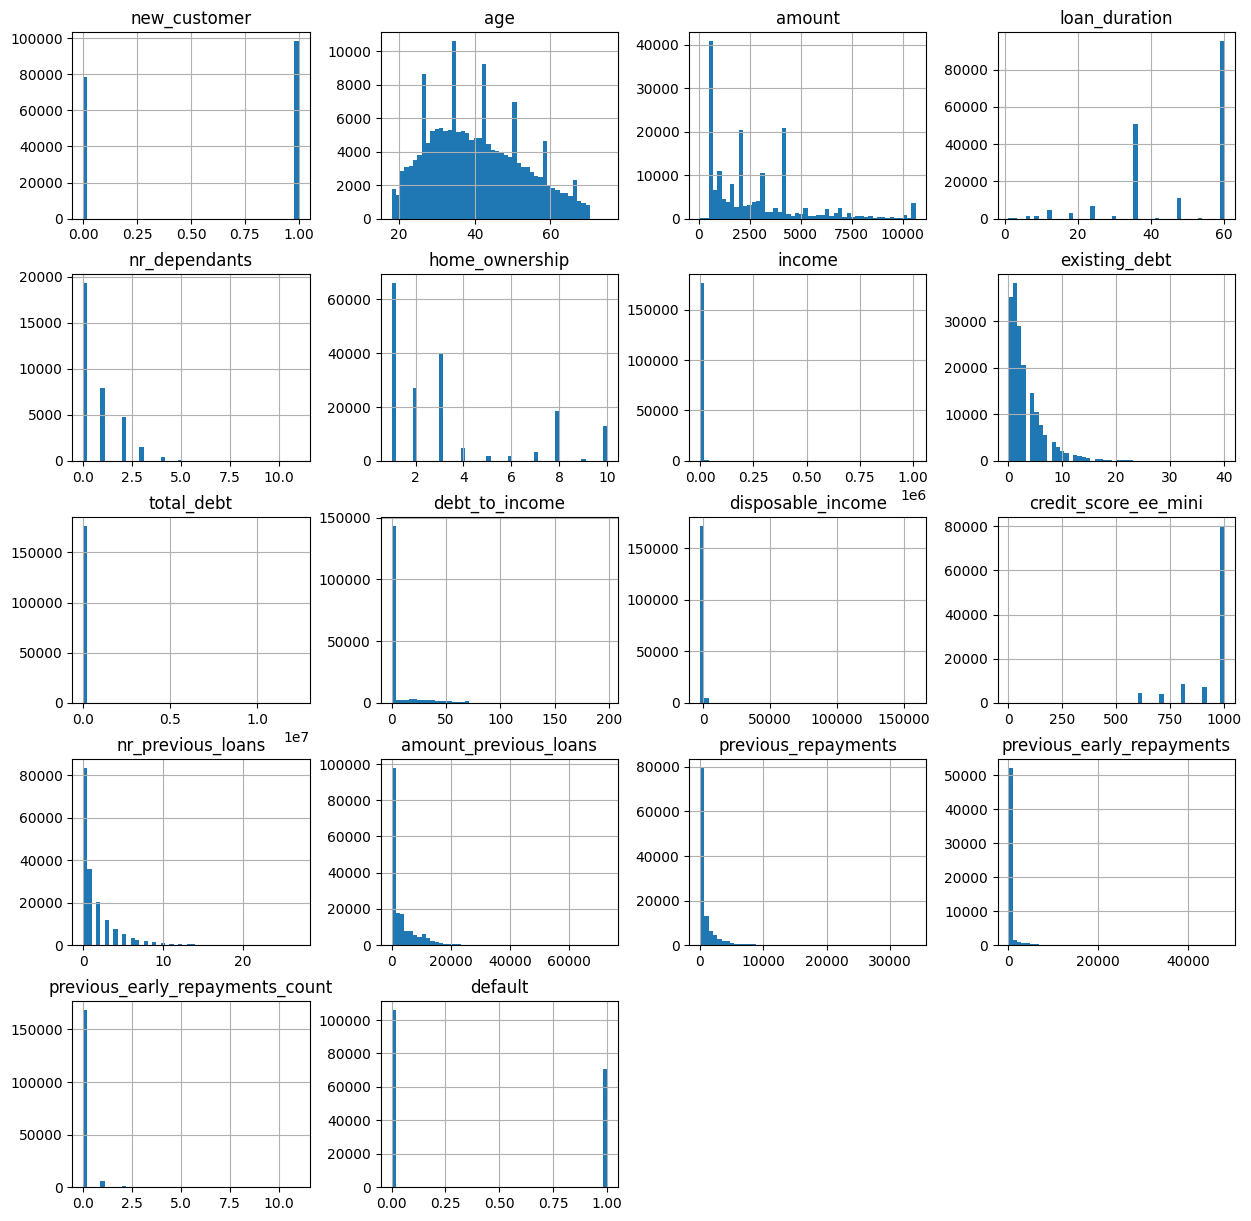

In [67]:
df[cols_num].hist(bins=50, figsize=(15, 15))
plt.show()

## Age

In [68]:
df["age"].describe()

count    176803.000000
mean         40.508102
std          12.326605
min          18.000000
25%          31.000000
50%          39.000000
75%          49.000000
max          75.000000
Name: age, dtype: float64

## Save data

In [69]:
df.default.value_counts()

default
0    106045
1     70758
Name: count, dtype: int64

In [70]:
42258 / 3

14086.0

In [71]:
# create further imbalance

df = pd.concat([
    df.loc[df.default == 0],
    df.loc[df.default == 1].sample(10086, random_state=1)
    ], axis=0
)

In [74]:
df.default.value_counts(normalize=True)

default
0    0.91315
1    0.08685
Name: proportion, dtype: float64

In [80]:
df.to_csv('C:\\Users\\dipsa\\Downloads\\cv new sayanti\\python project\\ML_Jupyter_2024\\LoanData_Bondora.csv', index=False)

In [82]:
df = pd.read_csv('C:\\Users\\dipsa\\Downloads\\cv new sayanti\\python project\\ML_Jupyter_2024\\LoanData_Bondora.csv', low_memory=False)

df.head()

,new_customer,income_verification,language,age,gender,country,amount,loan_duration,use_of_loan,education,marital_status,nr_dependants,employment_status,employment_duration,work_experience,occupation,home_ownership,income,existing_debt,total_debt,debt_to_income,disposable_income,credit_score_microL,credit_score_equifax,credit_score_fi_asiakas,credit_score_ee_mini,nr_previous_loans,amount_previous_loans,previous_repayments,previous_early_repayments,previous_early_repayments_count,default
0,1,unverified,spanish,47,male,ES,1000.0,12,vehicle,vocational,cohabitant,2.0,retiree,MoreThan5Years,5To10Years,other,1.0,1126.0,2,560.00,29.04,449.05,M5,C,NaN,NaN,0.0,0.0,0.00,1500.0,1.0,0
1,0,unverified,estonian,39,male,EE,5000.0,60,loan_consolidation,secondary,divorced,1.0,fully,UpTo5Years,15To25Years,transport,6.0,1000.0,9,1293.18,51.52,14.81,NaN,NaN,NaN,800.0,1.0,1000.0,106.17,5000.0,1.0,0
2,0,expenses_verified,estonian,31,male,EE,2000.0,60,other,secondary,single,0.0,fully,MoreThan5Years,2To5Years,transport,3.0,605.0,7,722.40,53.04,34.11,NaN,NaN,NaN,1000.0,2.0,2100.0,1574.57,2000.0,1.0,0
3,1,expenses_verified,estonian,45,female,EE,530.0,60,home_improvement,secondary,married,0.0,fully,MoreThan5Years,15To25Years,other,9.0,633.0,7,666.00,30.32,41.08,NaN,NaN,NaN,800.0,0.0,0.0,0.00,0.0,0.0,0
4,1,verified,estonian,49,male,EE,5500.0,60,home_improvement,secondary,divorced,0.0,entrepreneur,MoreThan5Years,MoreThan25Years,research,1.0,550.0,1,250.00,29.57,137.36,NaN,NaN,NaN,1000.0,0.0,0.0,0.00,0.0,0.0,0
